Nama: Nadya Zuhria Amana
Email: m004d4kx2486@bangkit.academy
ID Dicoding: nadyazuhria

Menentukan Pertanyaan Bisnis

1. Bagaimana Pengaruh kondisi terhadap pola peminjaman sepeda?
2. Kira-kira berapa prediksi jumlah peminjaman sepeda berdasarkan Jam dan Hari?

Import Semua Packages/Library yang Digunakan

In [576]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Wragling

In [577]:
hourly_data = pd.read_csv('hour.csv')
daily_data = pd.read_csv('day.csv')

Ghatering all_df

In [578]:
df = pd.read_csv("hour.csv", delimiter=",")
df = pd.read_csv("day.csv", delimiter=",")

In [579]:
merged_data = pd.merge(
    left=hourly_data,
    right=daily_data,
    how="inner",  # Jenis penggabungan, dalam hal ini menggunakan inner join
    left_on="dteday",  # Kolom yang digunakan untuk penggabungan pada all_dfframe kiri (hourly_all_df)
    right_on="dteday"  # Kolom yang digunakan untuk penggabungan pada all_dfframe kanan (daily_all_df)
)

In [580]:
print(merged_data.head())

   instant_x      dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1   0          0          6   
1          2  2011-01-01         1     0       1   1          0          6   
2          3  2011-01-01         1     0       1   2          0          6   
3          4  2011-01-01         1     0       1   3          0          6   
4          5  2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...          6             0             2   
1             0             1  ...          6             0             2   
2             0             1  ...          6             0             2   
3             0             1  ...          6             0             2   
4             0             1  ...          6             0             2   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  registered_y

Assessing all_df

In [581]:
#Mengecek missing valur pada data hour.csv dan day.csv

# Untuk data hourly
hourly_data.isnull().sum()

# Untuk data daily
daily_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [582]:
# Untuk data hourly
hourly_data.duplicated().sum()

# Untuk data daily
daily_data.duplicated().sum()


0

In [583]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [584]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [585]:
daily_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [586]:
hourly_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [587]:
print("Jumlah duplikasi: ",daily_data.duplicated().sum())
daily_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [588]:
print("Jumlah duplikasi: ",hourly_data.duplicated().sum())
hourly_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cleaning Data

In [589]:
hourly_data.dropna(inplace=True)
daily_data.dropna(inplace=True)

In [590]:
hourly_data.drop_duplicates(inplace=True)
daily_data.drop_duplicates(inplace=True)

In [591]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

In [592]:
# Gabungkan DataFrames hourly_data dan daily_data
all_df = pd.merge(hourly_data, daily_data, on='dteday')

# Simpan DataFrame all_df ke dalam file CSV
all_df.to_csv("main_data.csv", index=False)

Exploratory Data Analysis (EDA)

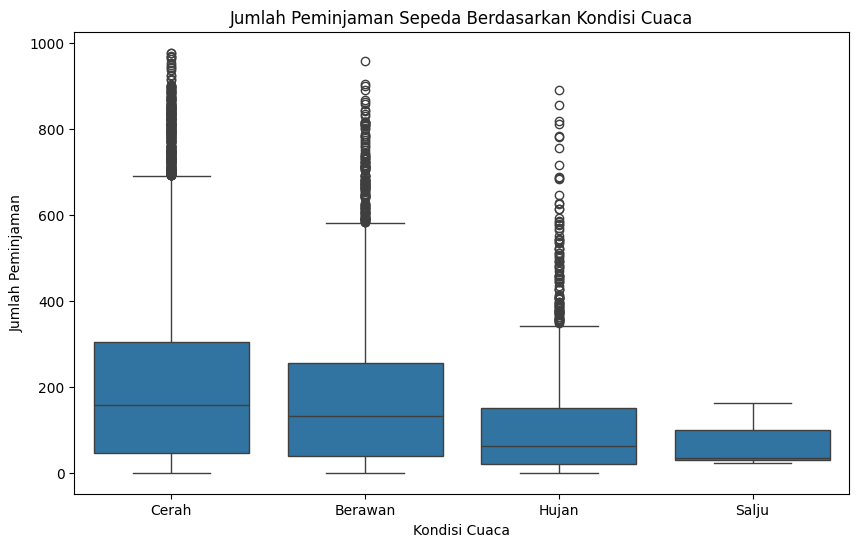

In [593]:
# Visualisasi jumlah peminjaman sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(data=hourly_data, x='weathersit', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan', 'Salju'])
plt.show()


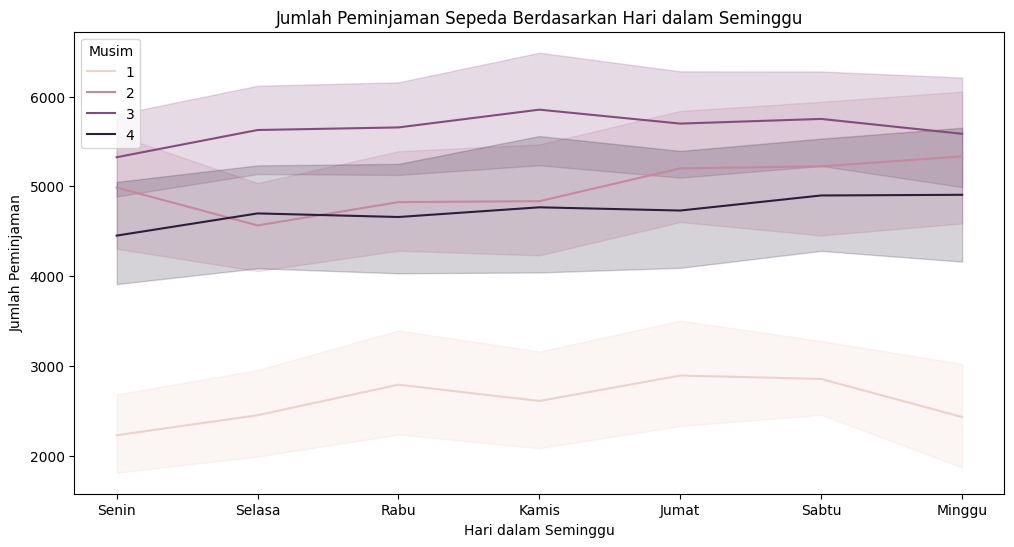

In [594]:
# Visualisasi jumlah peminjaman sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x='weekday', y='cnt', hue='season')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.legend(title='Musim')
plt.show()

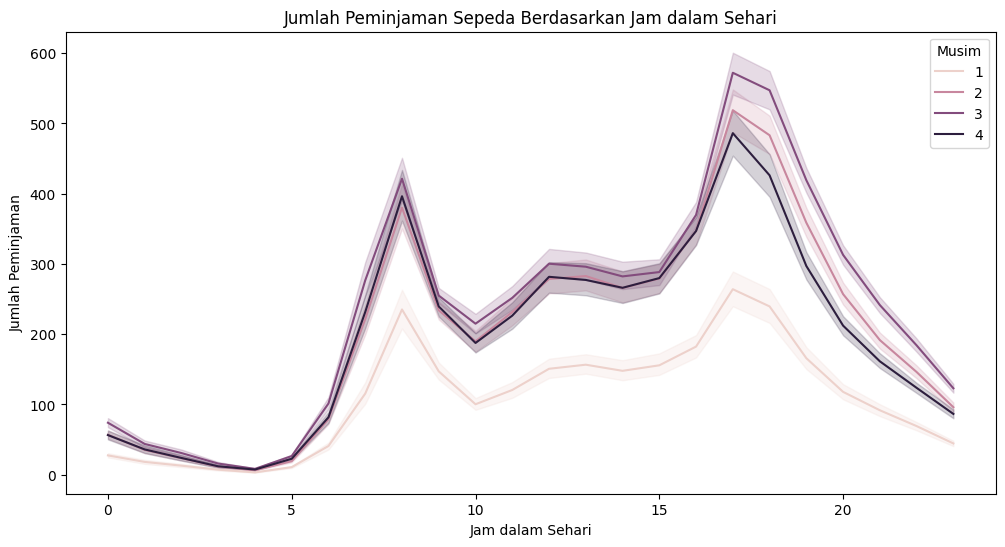

In [595]:
# Visualisasi jumlah peminjaman sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_data, x='hr', y='cnt', hue='season')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim')
plt.show()

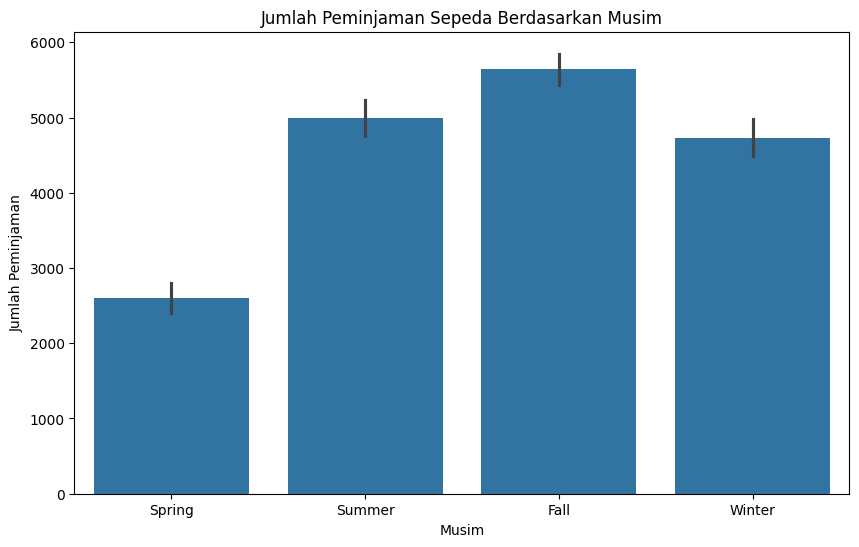

In [597]:
# Visualisasi jumlah peminjaman sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_data, x='season', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

In [598]:
average_rentals_by_weather = daily_data.groupby('season')['cnt'].mean()
print(average_rentals_by_weather)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


Conclussion

1. Dari hasil bloxspot diatas menunjukkan bahwa distribusi dari jumlah peminjaman sepeda berdasarkan kondisi cuaca itu sangat berpengaruh pada pola peminjaman sepeda. Peminjaman sepeda cenderung tinggi pada kondisi cerah atau sedikit berawan, sementara pada kondisi cuaca hujan atau salju, peminjaman sepeda cenderung rendah 

2. Dari hasil data visualisasi diatas antara hari dalam seminggu dan jam dalah satu hari. Disini saya menggunakan line plot untuk menunjukkan jumlah peminjaman sepeda dalam satu minggu dan jam dalam satu hari. Pada hari hari tertentu, terdapat fluktuasi jumlah peminjaman yang berbeda-beda, Misalnya pada jam jam berangkat kerja dan pulang kerja terjadi banyak sekali peningkatan peminjaman sepeda, lalu untuk musimnya tertinggi di musim gugur, diikuti dengan musim panas, musim dingin dan spring